In [56]:
import pandas as pd
import numpy as np

In [58]:
df =pd.read_csv('C:/Users/tpathuri/capstone project/fraud_oracle (1).csv')

In [59]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MONTHCLAIMED,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,1.0,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,5.0,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,2.0,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,2.0,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,2.0,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  object 
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  object 
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  object 
 6   MONTHCLAIMED          1782 non-null   float64
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15420 non-null  int64  
 11  Fault                 15420 non-null  object 
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15420 non-null  object 
 14  VehiclePrice          15420 non-null  object 
 15  FraudFound_P       

In [61]:
df.describe()

,WeekOfMonth,MONTHCLAIMED,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,1782.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,6.145342,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,3.340944,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,3.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,6.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,9.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,12.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [62]:
df.shape

(15420, 33)

In [64]:
df['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [65]:
df.isnull().sum() 

Month                       0
WeekOfMonth                 0
DayOfWeek                   0
Make                        0
AccidentArea                0
DayOfWeekClaimed            0
MONTHCLAIMED            13638
WeekOfMonthClaimed          0
Sex                         0
MaritalStatus               0
Age                         0
Fault                       0
PolicyType                  0
VehicleCategory             0
VehiclePrice                0
FraudFound_P                0
PolicyNumber                0
RepNumber                   0
Deductible                  0
DriverRating                0
Days_Policy_Accident        0
Days_Policy_Claim           0
PastNumberOfClaims          0
AgeOfVehicle                0
AgeOfPolicyHolder           0
PoliceReportFiled           0
WitnessPresent              0
AgentType                   0
NumberOfSuppliments         0
AddressChange_Claim         0
NumberOfCars                0
Year                        0
BasePolicy                  0
dtype: int

In [66]:
pd.set_option('display.max_columns', None)  # Set the option to display all columns
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MONTHCLAIMED,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,1.0,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,5.0,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,2.0,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,2.0,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,2.0,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [68]:
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1})

In [69]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MONTHCLAIMED,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,1.0,1,1,0.0,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,5.0,4,0,0.0,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,2.0,2,0,1.0,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,2.0,1,0,1.0,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,2.0,2,1,0.0,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [70]:
df['MONTHCLAIMED'].unique()

array([ 1.,  5.,  2.,  3.,  7.,  6., 11.,  4., 10.,  8.,  9., 12., nan])

In [71]:
df = df[df['MONTHCLAIMED'] != '0']

In [73]:
df['DayOfWeek'].unique()

array(['Wednesday', 'Friday', 'Saturday', 'Monday', 'Tuesday', 'Sunday',
       'Thursday'], dtype=object)

In [75]:
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping)

In [77]:
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].map(day_mapping)

In [78]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MONTHCLAIMED,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,2,Honda,Urban,NaN,1.0,1,1,0.0,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,2,Honda,Urban,NaN,5.0,4,0,0.0,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,4,Honda,Urban,NaN,2.0,2,0,1.0,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,5,Toyota,Rural,NaN,2.0,1,0,1.0,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,0,Honda,Urban,NaN,2.0,2,1,0.0,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [79]:
df['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [80]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Make'] = le.fit_transform(df['Make'])

In [81]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MONTHCLAIMED,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,2,6,Urban,NaN,1.0,1,1,0.0,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,2,6,Urban,NaN,5.0,4,0,0.0,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,4,6,Urban,NaN,2.0,2,0,1.0,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,5,17,Rural,NaN,2.0,1,0,1.0,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,0,6,Urban,NaN,2.0,2,1,0.0,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [83]:
df['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [84]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['Month', 'AccidentArea', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [85]:
categorical_columns

['Month',
 'AccidentArea',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [89]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['AccidentArea',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

le = LabelEncoder()

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [90]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MONTHCLAIMED,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,2,6,1,NaN,1.0,1,1,0.0,21,0,5,1,5,0,1,12,300,1,3,2,3,1,3,0,0,0,3,0,2,1994,2
1,Jan,3,2,6,1,NaN,5.0,4,0,0.0,34,0,4,1,5,0,2,15,400,4,3,2,3,4,4,1,0,0,3,3,0,1994,1
2,Oct,5,4,6,1,NaN,2.0,2,0,1.0,47,0,4,1,5,0,3,7,400,3,3,2,0,5,6,0,0,0,3,3,0,1994,1
3,Jun,2,5,17,0,NaN,2.0,1,0,1.0,65,1,2,1,0,0,4,4,400,2,3,2,0,6,7,1,0,0,2,3,0,1994,2
4,Jan,5,0,6,1,NaN,2.0,2,1,0.0,27,1,4,1,5,0,5,3,400,1,3,2,3,3,4,0,0,0,3,3,0,1994,1


In [91]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MONTHCLAIMED', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [93]:

y = df['FraudFound_P']
X = df.drop('FraudFound_P', axis = 1)

In [94]:
X.describe()

,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MONTHCLAIMED,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
count,15420.000000,15420.000000,15420.000000,15420.000000,0.0,1782.000000,15420.000000,15420.000000,15309.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.00000,15420.00000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.807847,10.114591,0.896368,NaN,6.145342,2.693969,0.156939,0.694036,39.855707,0.271725,1.260636,0.398184,1.291829,7710.500000,8.483268,407.704280,2.487808,2.990921,1.99144,1.46310,4.799287,4.891894,0.027756,0.005642,0.015629,2.003372,2.888521,0.098833,1994.866472,1.036316
std,1.287585,1.979394,5.282919,0.304792,NaN,3.340944,1.259115,0.363755,0.460830,13.492377,0.444863,1.190999,0.538856,1.837535,4451.514911,4.599948,43.950998,1.119453,0.167138,0.12602,1.12987,1.140206,1.395907,0.164279,0.074904,0.124039,1.110645,0.451081,0.383472,0.803313,0.782355
min,1.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1994.000000,0.000000
25%,2.000000,1.000000,6.000000,1.000000,NaN,3.000000,2.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,3.000000,2.00000,1.00000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1994.000000,0.000000
50%,3.000000,3.000000,9.000000,1.000000,NaN,6.000000,3.000000,0.000000,1.000000,38.000000,0.000000,1.000000,0.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,3.000000,2.00000,1.00000,5.000000,5.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1995.000000,1.000000
75%,4.000000,4.000000,13.000000,1.000000,NaN,9.000000,4.000000,0.000000,1.000000,48.000000,1.000000,2.000000,1.000000,1.000000,11565.250000,12.000000,400.000000,3.000000,3.000000,2.00000,3.00000,6.000000,6.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1996.000000,2.000000
max,5.000000,6.000000,18.000000,1.000000,NaN,12.000000,5.000000,1.000000,1.000000,80.000000,1.000000,8.000000,2.000000,5.000000,15420.000000,16.000000,700.000000,4.000000,4.000000,3.00000,3.00000,7.000000,8.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1996.000000,2.000000


In [95]:
y.describe()

count    15420.000000
mean         0.059857
std          0.237230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: FraudFound_P, dtype: float64

In [96]:
# Check the number of rows and columns
print(df.shape)

(15420, 33)


In [97]:
print(df.dtypes)

Month                    object
WeekOfMonth               int64
DayOfWeek                 int64
Make                      int32
AccidentArea              int32
DayOfWeekClaimed        float64
MONTHCLAIMED            float64
WeekOfMonthClaimed        int64
Sex                       int64
MaritalStatus           float64
Age                       int64
Fault                     int32
PolicyType                int32
VehicleCategory           int32
VehiclePrice              int32
FraudFound_P              int64
PolicyNumber              int64
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident      int32
Days_Policy_Claim         int32
PastNumberOfClaims        int32
AgeOfVehicle              int32
AgeOfPolicyHolder         int32
PoliceReportFiled         int32
WitnessPresent            int32
AgentType                 int32
NumberOfSuppliments       int32
AddressChange_Claim       int32
NumberOfCars              int32
Year    

In [98]:
print(df.isnull().sum())

Month                       0
WeekOfMonth                 0
DayOfWeek                   0
Make                        0
AccidentArea                0
DayOfWeekClaimed        15420
MONTHCLAIMED            13638
WeekOfMonthClaimed          0
Sex                         0
MaritalStatus             111
Age                         0
Fault                       0
PolicyType                  0
VehicleCategory             0
VehiclePrice                0
FraudFound_P                0
PolicyNumber                0
RepNumber                   0
Deductible                  0
DriverRating                0
Days_Policy_Accident        0
Days_Policy_Claim           0
PastNumberOfClaims          0
AgeOfVehicle                0
AgeOfPolicyHolder           0
PoliceReportFiled           0
WitnessPresent              0
AgentType                   0
NumberOfSuppliments         0
AddressChange_Claim         0
NumberOfCars                0
Year                        0
BasePolicy                  0
dtype: int

In [99]:
print(df.describe())

        WeekOfMonth     DayOfWeek          Make  AccidentArea  \
count  15420.000000  15420.000000  15420.000000  15420.000000   
mean       2.788586      2.807847     10.114591      0.896368   
std        1.287585      1.979394      5.282919      0.304792   
min        1.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.000000      6.000000      1.000000   
50%        3.000000      3.000000      9.000000      1.000000   
75%        4.000000      4.000000     13.000000      1.000000   
max        5.000000      6.000000     18.000000      1.000000   

       DayOfWeekClaimed  MONTHCLAIMED  WeekOfMonthClaimed           Sex  \
count               0.0   1782.000000        15420.000000  15420.000000   
mean                NaN      6.145342            2.693969      0.156939   
std                 NaN      3.340944            1.259115      0.363755   
min                 NaN      1.000000            1.000000      0.000000   
25%                 NaN      3.000000  

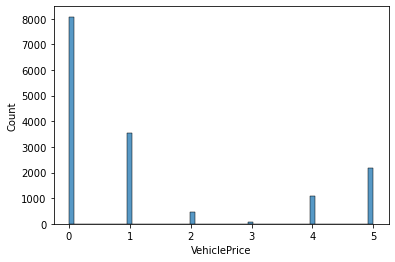

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['VehiclePrice'])
plt.show()

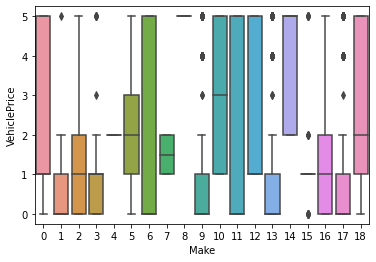

In [102]:
sns.boxplot(x='Make', y='VehiclePrice', data=df)
plt.show()

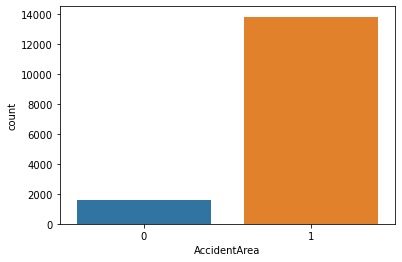

In [103]:
sns.countplot(x='AccidentArea', data=df)
plt.show()

In [104]:
df_og = pd.read_csv('C:/Users/tpathuri/capstone project/fraud_oracle (1).csv')

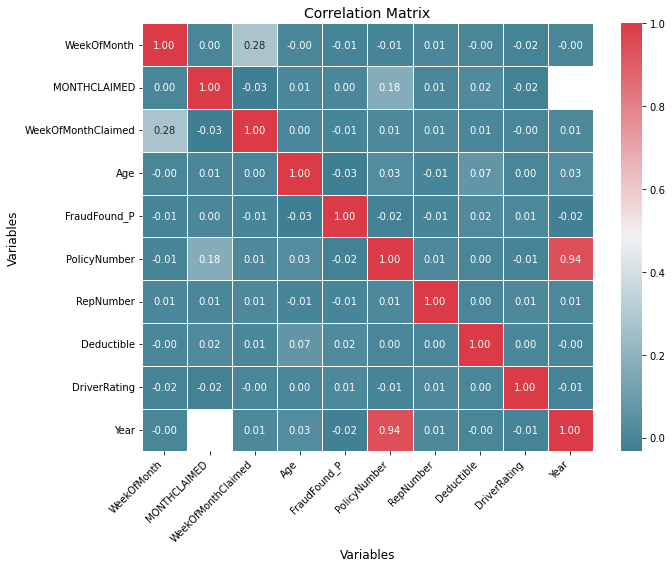

In [105]:

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_og.corr()

fig, ax = plt.subplots(figsize=(10, 8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, ax=ax)

ax.set_title("Correlation Matrix", fontsize=14)
ax.set_xlabel("Variables", fontsize=12)
ax.set_ylabel("Variables", fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

plt.show()


In [107]:
df.dropna(axis=0, inplace=True)

In [108]:
print(df.dtypes)

Month                    object
WeekOfMonth               int64
DayOfWeek                 int64
Make                      int32
AccidentArea              int32
DayOfWeekClaimed        float64
MONTHCLAIMED            float64
WeekOfMonthClaimed        int64
Sex                       int64
MaritalStatus           float64
Age                       int64
Fault                     int32
PolicyType                int32
VehicleCategory           int32
VehiclePrice              int32
FraudFound_P              int64
PolicyNumber              int64
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident      int32
Days_Policy_Claim         int32
PastNumberOfClaims        int32
AgeOfVehicle              int32
AgeOfPolicyHolder         int32
PoliceReportFiled         int32
WitnessPresent            int32
AgentType                 int32
NumberOfSuppliments       int32
AddressChange_Claim       int32
NumberOfCars              int32
Year    

In [110]:

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']
print(X.head())

model = IsolationForest(contamination=0.01) 
model.fit(X)

anomaly_scores = model.decision_function(X)
predictions = model.predict(X)

fraud_indices = [index for index, pred in enumerate(predictions) if pred == -1]
fraud_cases = df.iloc[fraud_indices]

(fraud_cases)

Empty DataFrame
Columns: [Month, WeekOfMonth, DayOfWeek, Make, AccidentArea, DayOfWeekClaimed, MONTHCLAIMED, WeekOfMonthClaimed, Sex, MaritalStatus, Age, Fault, PolicyType, VehicleCategory, VehiclePrice, PolicyNumber, RepNumber, Deductible, DriverRating, Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle, AgeOfPolicyHolder, PoliceReportFiled, WitnessPresent, AgentType, NumberOfSuppliments, AddressChange_Claim, NumberOfCars, Year, BasePolicy]
Index: []


ValueError: Found array with 0 sample(s) (shape=(0, 32)) while a minimum of 1 is required.

In [ ]:
# Train the Isolation Forest model
model = IsolationForest(contamination=0.01)  # Adjust the contamination parameter based on the expected fraud rate
model.fit(X_train_scaled)

# Predict anomalies on the test set
anomaly_scores = model.decision_function(X_test_scaled)
predictions = model.predict(X_test_scaled)
print(predictions)

# Identify the fraud cases in the test set
fraud_indices = [index for index, pred in enumerate(predictions) if pred == -1]
fraud_cases = X_test.iloc[fraud_indices]

# Print the fraud cases in the test set
fraud_cases